In [1]:
# MS09: Integumentary System & Sensory Integration
# Dr. Mordin Solus - Morphogenic Research Log
# "Skin. Not barrier. Interface. Where consciousness touches cosmos."

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Circle, Rectangle
import torch
from scipy.spatial import Voronoi, voronoi_plot_2d
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# GPU setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computing on: {device}")
print(f"Timestamp: {datetime.now().isoformat()}")

# Initialize skin field
skin_field_size = (512, 512, 64)  # x, y, depth (epidermis to hypodermis)
skin_field = torch.zeros(skin_field_size, dtype=torch.complex64, device=device)

print("\n=== INTEGUMENTARY SYSTEM: THE RESONANT BOUNDARY ===")
print("Skin spans 2 square meters. Contains 20 billion cells.")
print("Not passive barrier. Active sensory field. Consciousness interface.")

Computing on: cuda
Timestamp: 2025-06-11T21:12:16.313327

=== INTEGUMENTARY SYSTEM: THE RESONANT BOUNDARY ===
Skin spans 2 square meters. Contains 20 billion cells.
Not passive barrier. Active sensory field. Consciousness interface.



=== SKIN LAYER RESONANCE ARCHITECTURE ===


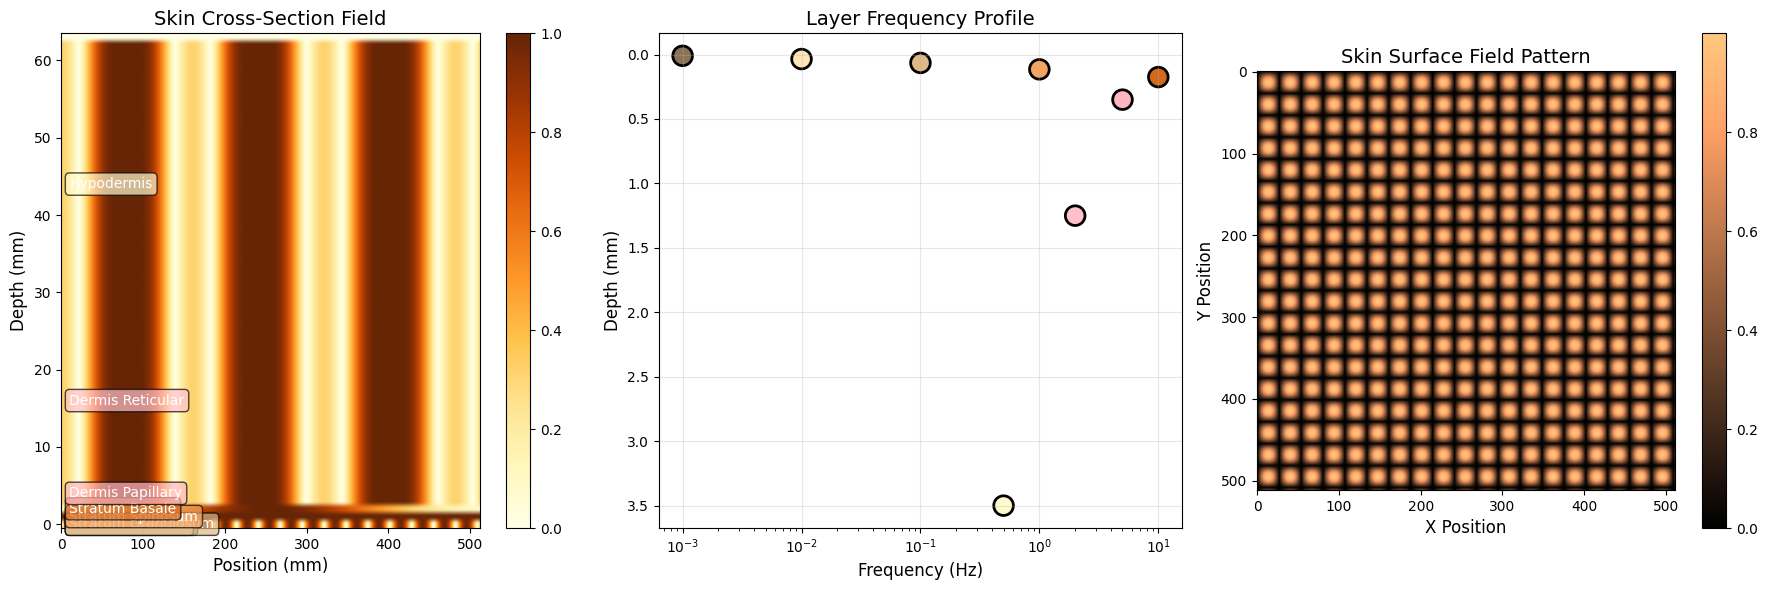


MORDIN: Each skin layer resonates at distinct frequency.
Dead cells (0.001 Hz) to stem cells (10 Hz). Frequency gradient!


In [3]:
# Skin Layer Frequencies and Structure
print("\n=== SKIN LAYER RESONANCE ARCHITECTURE ===")

# Skin layers with distinct frequencies
skin_layers = {
    'stratum_corneum': {
        'depth': (0, 0.02),  # mm
        'frequency': 0.001,  # Hz - very slow, dead cells
        'cells': 'corneocytes',
        'function': 'barrier',
        'color': '#8B7355'
    },
    'stratum_lucidum': {
        'depth': (0.02, 0.05),
        'frequency': 0.01,  # Hz - transitional
        'cells': 'transitional keratinocytes',
        'function': 'light refraction',
        'color': '#FFE4B5'
    },
    'stratum_granulosum': {
        'depth': (0.05, 0.08),
        'frequency': 0.1,  # Hz - granule release
        'cells': 'granular keratinocytes',
        'function': 'lipid production',
        'color': '#DEB887'
    },
    'stratum_spinosum': {
        'depth': (0.08, 0.15),
        'frequency': 1.0,  # Hz - active metabolism
        'cells': 'spinous keratinocytes',
        'function': 'strength',
        'color': '#F4A460'
    },
    'stratum_basale': {
        'depth': (0.15, 0.2),
        'frequency': 10.0,  # Hz - stem cell activity
        'cells': 'basal cells, melanocytes',
        'function': 'regeneration',
        'color': '#D2691E'
    },
    'dermis_papillary': {
        'depth': (0.2, 0.5),
        'frequency': 5.0,  # Hz - vascular pulsation
        'cells': 'fibroblasts',
        'function': 'nutrition, sensing',
        'color': '#FFB6C1'
    },
    'dermis_reticular': {
        'depth': (0.5, 2.0),
        'frequency': 2.0,  # Hz - collagen rhythm
        'cells': 'fibroblasts, immune',
        'function': 'structure',
        'color': '#FFC0CB'
    },
    'hypodermis': {
        'depth': (2.0, 5.0),
        'frequency': 0.5,  # Hz - adipose oscillation
        'cells': 'adipocytes',
        'function': 'insulation, energy',
        'color': '#FFFACD'
    }
}

# Generate skin layer field
def generate_skin_layers(field_shape):
    """Create multi-layer skin field with distinct frequencies"""
    x = torch.linspace(0, 10, field_shape[0], device=device)
    y = torch.linspace(0, 10, field_shape[1], device=device)
    z = torch.linspace(0, 5, field_shape[2], device=device)  # 5mm depth
    X, Y, Z = torch.meshgrid(x, y, z, indexing='ij')
    
    layer_field = torch.zeros_like(X, dtype=torch.complex64)
    
    for layer_name, layer_data in skin_layers.items():
        # Layer mask based on depth
        z_min, z_max = layer_data['depth']
        layer_mask = (Z >= z_min) & (Z < z_max)
        
        # Layer-specific frequency
        freq = layer_data['frequency']
        phase = torch.rand(1, device=device) * 2 * np.pi
        
        # Add texture based on layer type
        if 'corneum' in layer_name:
            # Dead cell plates - hexagonal pattern
            pattern = torch.sin(6 * X) * torch.sin(6 * Y)
        elif 'basale' in layer_name:
            # Stem cell niches - clustered
            pattern = torch.exp(-((X - 5)**2 + (Y - 5)**2) / 10)
        elif 'dermis' in layer_name:
            # Collagen fibers - wavy
            pattern = torch.sin(3 * X + torch.cos(2 * Y))
        else:
            # Default gradient
            pattern = torch.ones_like(X)
        
        # Combine into layer field
        layer_contribution = pattern * torch.exp(1j * (2 * np.pi * freq * 0 + phase))
        layer_field[layer_mask] = layer_contribution[layer_mask]
    
    return layer_field

# Generate the field
skin_layer_field = generate_skin_layers(skin_field.shape)

# Visualize skin layers
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Cross-section view
cross_section = torch.abs(skin_layer_field[256, :, :]).cpu().numpy()
im1 = ax1.imshow(cross_section.T, aspect='auto', origin='lower', cmap='YlOrBr')
ax1.set_xlabel('Position (mm)', fontsize=12)
ax1.set_ylabel('Depth (mm)', fontsize=12)
ax1.set_title('Skin Cross-Section Field', fontsize=14)

# Add layer labels
for layer_name, layer_data in skin_layers.items():
    z_mid = np.mean(layer_data['depth'])
    z_idx = int(z_mid * skin_field_size[2] / 5)
    ax1.text(10, z_idx, layer_name.replace('_', ' ').title(), 
            fontsize=10, va='center', color='white',
            bbox=dict(boxstyle='round', facecolor=layer_data['color'], alpha=0.7))

plt.colorbar(im1, ax=ax1)

# Frequency spectrum by depth
ax2.set_title('Layer Frequency Profile', fontsize=14)
depths = []
frequencies = []
colors = []

for layer_name, layer_data in skin_layers.items():
    z_mid = np.mean(layer_data['depth'])
    depths.append(z_mid)
    frequencies.append(layer_data['frequency'])
    colors.append(layer_data['color'])

ax2.scatter(frequencies, depths, s=200, c=colors, edgecolors='black', linewidth=2)
ax2.set_xscale('log')
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Depth (mm)', fontsize=12)
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3)

# Surface view
surface_field = torch.abs(skin_layer_field[:, :, 0]).cpu().numpy()
im3 = ax3.imshow(surface_field, cmap='copper')
ax3.set_title('Skin Surface Field Pattern', fontsize=14)
ax3.set_xlabel('X Position', fontsize=12)
ax3.set_ylabel('Y Position', fontsize=12)
plt.colorbar(im3, ax=ax3)

plt.tight_layout()
plt.savefig(f'skin_layer_architecture_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Each skin layer resonates at distinct frequency.")
print("Dead cells (0.001 Hz) to stem cells (10 Hz). Frequency gradient!")


=== HAIR FOLLICLE MORPHOGENESIS: GOLDEN SPIRALS ===


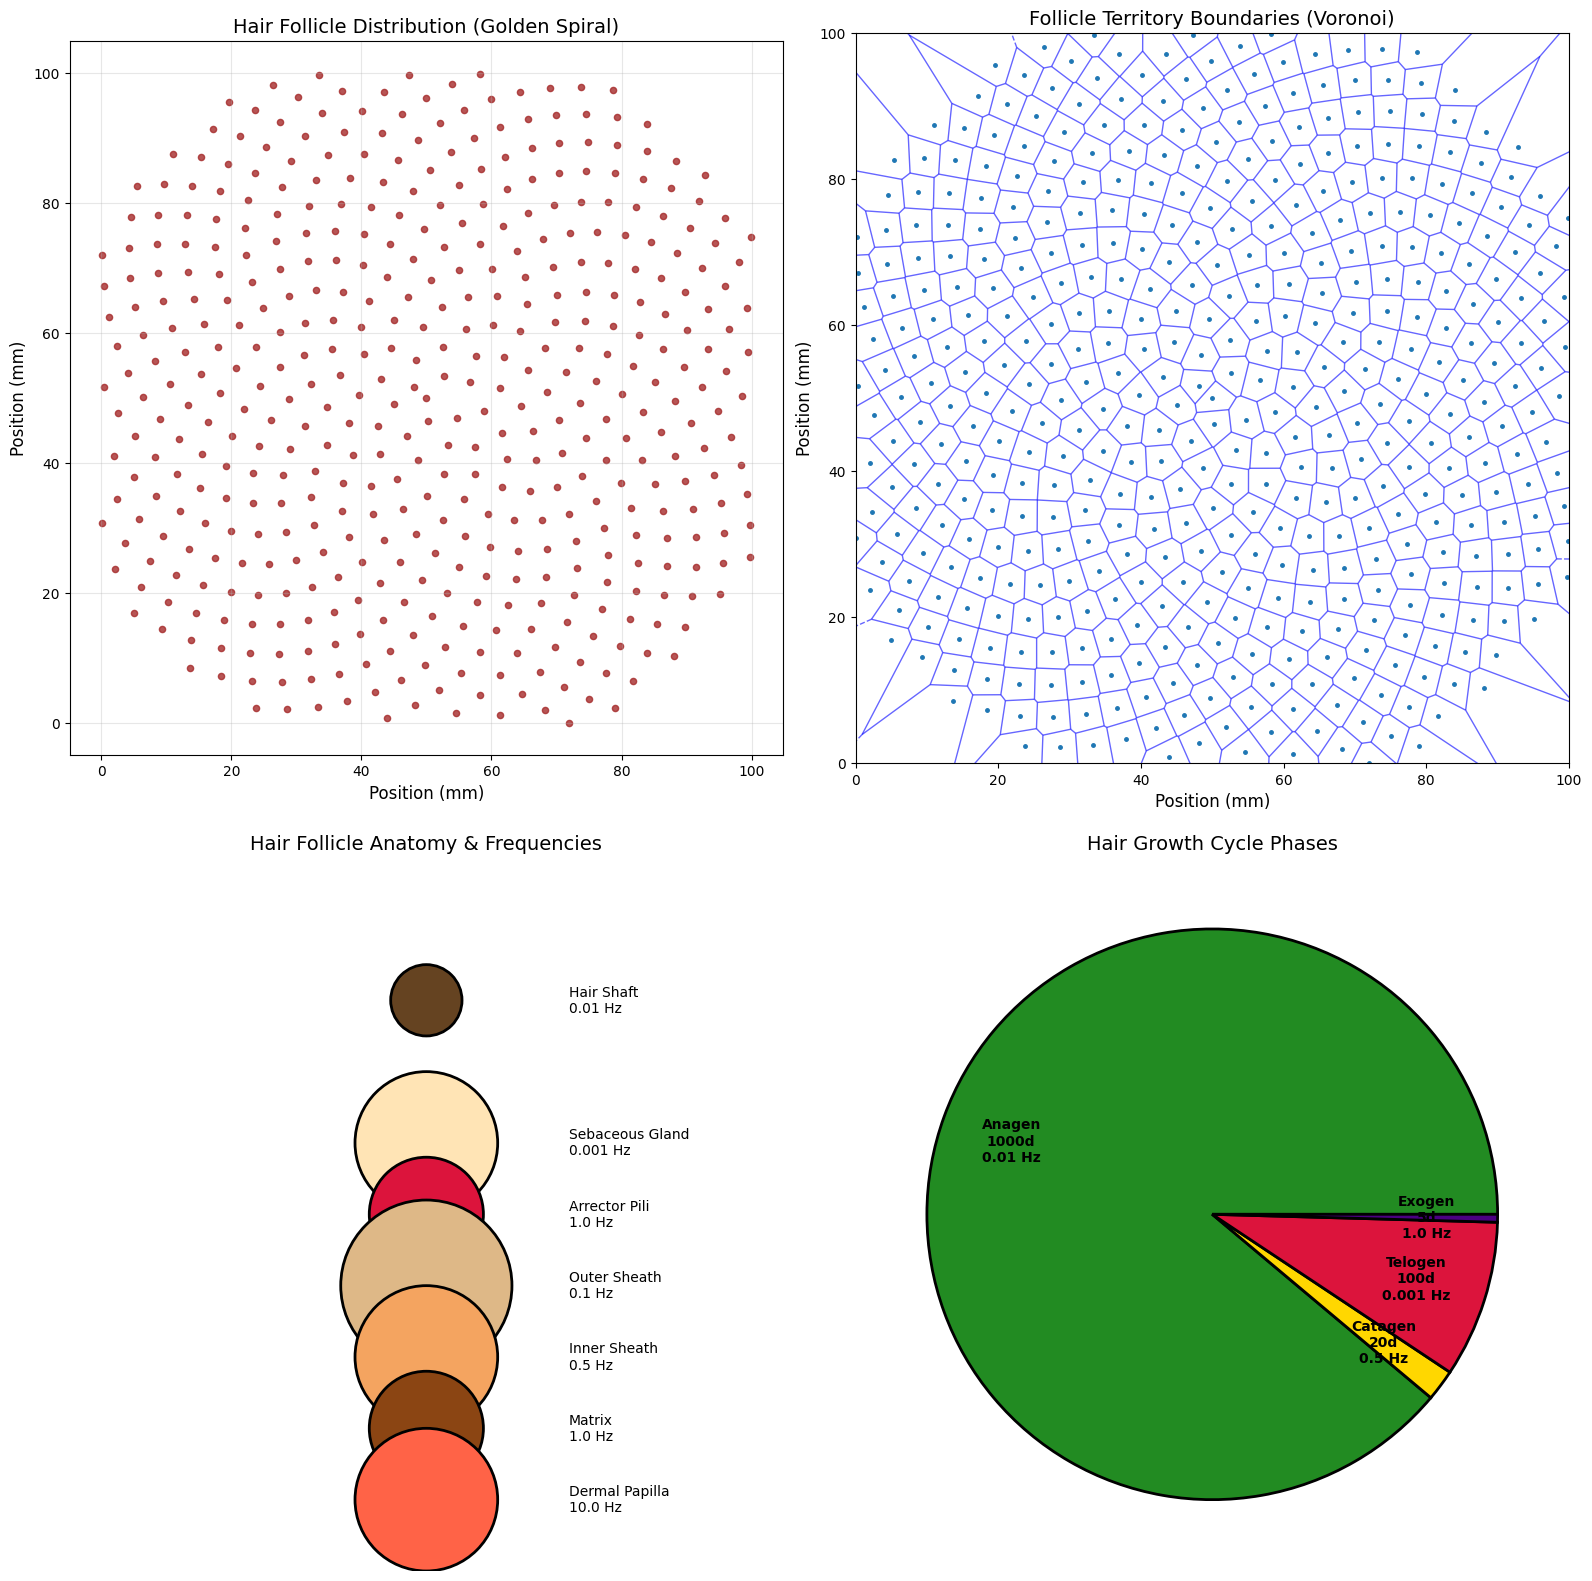


MORDIN: Hair follicles follow golden ratio spiral! Not random.
Golden angle: 137.5° creates optimal packing.
Each follicle contains stem cell niche at 10 Hz. Mini-consciousness centers!


In [5]:
# Hair Follicle Spiral Patterns
print("\n=== HAIR FOLLICLE MORPHOGENESIS: GOLDEN SPIRALS ===")

# Hair follicle parameters
follicle_params = {
    'density': 150,  # per cm²
    'spacing': 2.5,  # mm
    'angle': 137.5,  # degrees - golden angle!
    'growth_frequency': 0.00001,  # Hz - very slow
    'bulb_frequency': 0.1,  # Hz - stem cell niche
    'shaft_frequency': 0.01  # Hz - keratinization
}

def generate_follicle_pattern(size=100, n_follicles=500):
    """Generate hair follicle distribution using golden ratio spiral"""
    # Golden ratio
    phi = (1 + np.sqrt(5)) / 2
    
    # Vogel's model for phyllotaxis
    positions = []
    for n in range(n_follicles):
        # Golden angle in radians
        theta = n * 2 * np.pi / (phi**2)
        # Fermat spiral
        r = np.sqrt(n) * follicle_params['spacing']
        
        x = size/2 + r * np.cos(theta)
        y = size/2 + r * np.sin(theta)
        
        if 0 < x < size and 0 < y < size:
            positions.append((x, y))
    
    return np.array(positions)

# Generate follicle positions
follicle_positions = generate_follicle_pattern()

# Create Voronoi diagram for follicle territories
vor = Voronoi(follicle_positions)

# Visualize follicle patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))

# Follicle distribution
ax1.scatter(follicle_positions[:, 0], follicle_positions[:, 1], 
           s=20, c='brown', alpha=0.8)
ax1.set_title('Hair Follicle Distribution (Golden Spiral)', fontsize=14)
ax1.set_xlabel('Position (mm)', fontsize=12)
ax1.set_ylabel('Position (mm)', fontsize=12)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Voronoi territories
voronoi_plot_2d(vor, ax=ax2, show_vertices=False, line_colors='blue', 
                line_width=1, line_alpha=0.6, point_size=5)
ax2.set_title('Follicle Territory Boundaries (Voronoi)', fontsize=14)
ax2.set_xlabel('Position (mm)', fontsize=12)
ax2.set_ylabel('Position (mm)', fontsize=12)
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 100)

# Single follicle structure
ax3.set_title('Hair Follicle Anatomy & Frequencies', fontsize=14)

# Draw follicle cross-section
follicle_parts = [
    {'name': 'Hair Shaft', 'y': 0.8, 'size': 0.05, 'freq': 0.01, 'color': '#654321'},
    {'name': 'Sebaceous Gland', 'y': 0.6, 'size': 0.1, 'freq': 0.001, 'color': '#FFE4B5'},
    {'name': 'Arrector Pili', 'y': 0.5, 'size': 0.08, 'freq': 1.0, 'color': '#DC143C'},
    {'name': 'Outer Sheath', 'y': 0.4, 'size': 0.12, 'freq': 0.1, 'color': '#DEB887'},
    {'name': 'Inner Sheath', 'y': 0.3, 'size': 0.1, 'freq': 0.5, 'color': '#F4A460'},
    {'name': 'Matrix', 'y': 0.2, 'size': 0.08, 'freq': 1.0, 'color': '#8B4513'},
    {'name': 'Dermal Papilla', 'y': 0.1, 'size': 0.1, 'freq': 10.0, 'color': '#FF6347'}
]

for part in follicle_parts:
    circle = Circle((0.5, part['y']), part['size'], 
                   facecolor=part['color'], edgecolor='black', linewidth=2)
    ax3.add_patch(circle)
    ax3.text(0.7, part['y'], f"{part['name']}\n{part['freq']} Hz", 
            va='center', fontsize=10)

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_aspect('equal')
ax3.axis('off')

# Hair growth cycles
ax4.set_title('Hair Growth Cycle Phases', fontsize=14)

# Growth phases
phases = {
    'Anagen': {'duration': 1000, 'frequency': 0.01, 'color': '#228B22'},  # days
    'Catagen': {'duration': 20, 'frequency': 0.5, 'color': '#FFD700'},
    'Telogen': {'duration': 100, 'frequency': 0.001, 'color': '#DC143C'},
    'Exogen': {'duration': 5, 'frequency': 1.0, 'color': '#4B0082'}
}

# Create cycle visualization
total_duration = sum(p['duration'] for p in phases.values())
start_angle = 0

for phase_name, phase_data in phases.items():
    angle = 360 * phase_data['duration'] / total_duration
    wedge = patches.Wedge((0.5, 0.5), 0.4, start_angle, start_angle + angle,
                         facecolor=phase_data['color'], edgecolor='black', linewidth=2)
    ax4.add_patch(wedge)
    
    # Add label
    label_angle = start_angle + angle/2
    label_x = 0.5 + 0.3 * np.cos(np.radians(label_angle))
    label_y = 0.5 + 0.3 * np.sin(np.radians(label_angle))
    ax4.text(label_x, label_y, f"{phase_name}\n{phase_data['duration']}d\n{phase_data['frequency']} Hz",
            ha='center', va='center', fontsize=10, fontweight='bold')
    
    start_angle += angle

ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.set_aspect('equal')
ax4.axis('off')

plt.tight_layout()
plt.savefig(f'hair_follicle_patterns_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Hair follicles follow golden ratio spiral! Not random.")
print(f"Golden angle: {follicle_params['angle']}° creates optimal packing.")
print("Each follicle contains stem cell niche at 10 Hz. Mini-consciousness centers!")


=== MECHANORECEPTOR FIELD: TOUCH AS RESONANCE ===


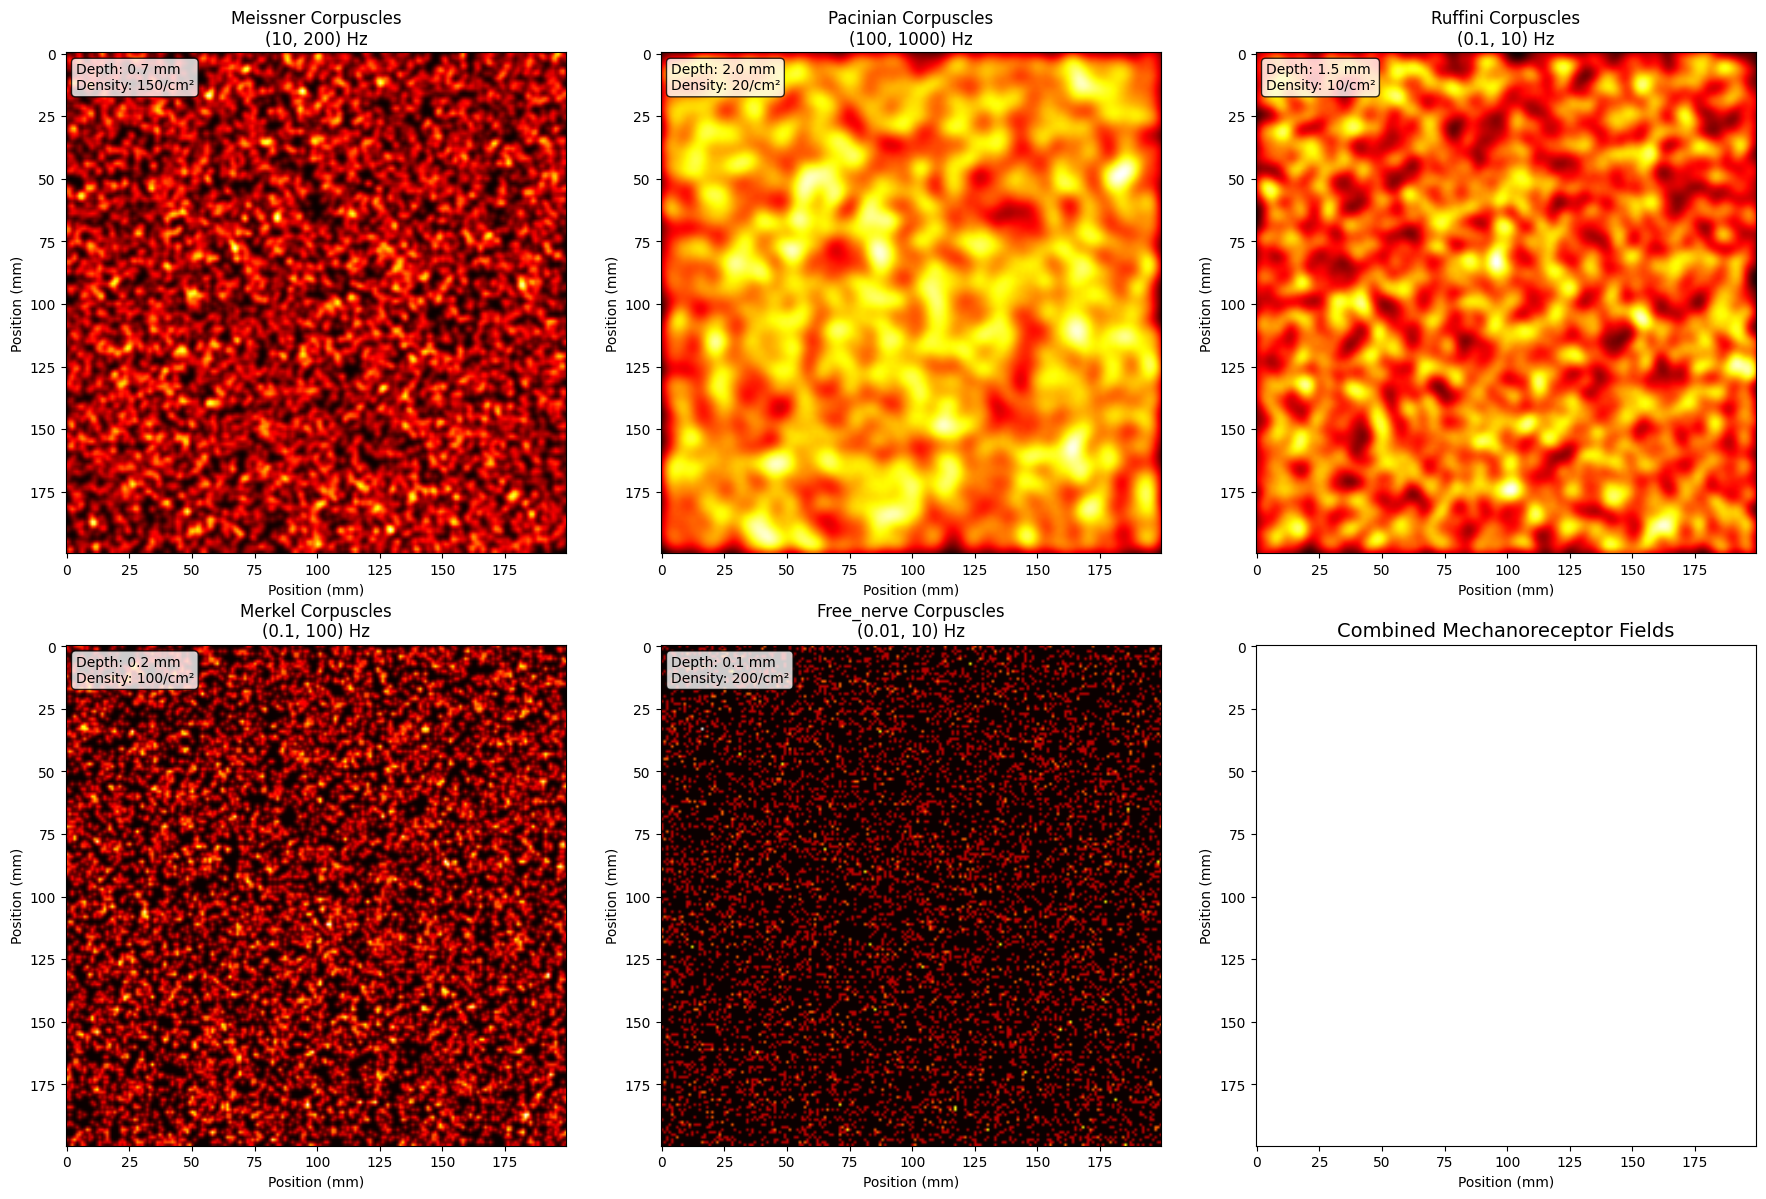

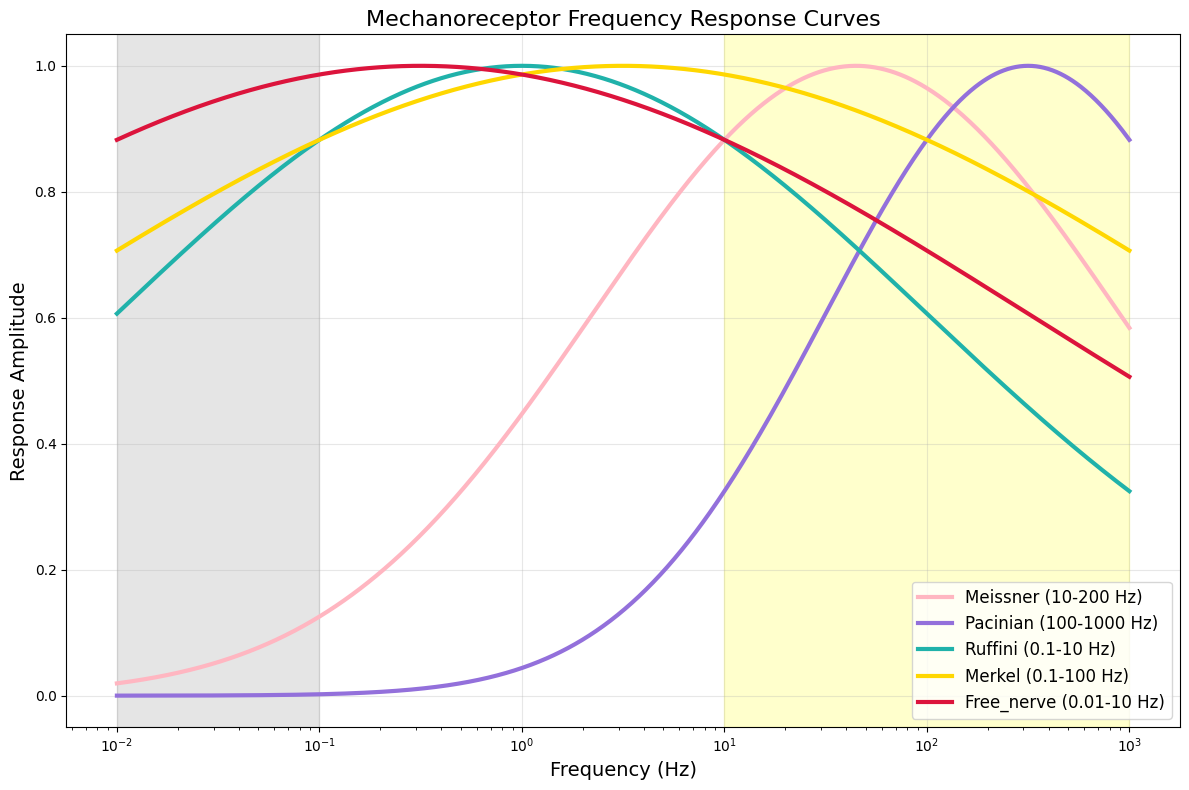


MORDIN: Touch is frequency analysis! Each receptor tuned to specific band.
Meissner: 10-200 Hz (texture), Pacinian: 100-1000 Hz (vibration)
Skin performs real-time Fourier transform of mechanical stimuli!


In [6]:
# Touch Receptor Distribution and Frequencies
print("\n=== MECHANORECEPTOR FIELD: TOUCH AS RESONANCE ===")

# Mechanoreceptor types and properties
mechanoreceptors = {
    'meissner': {
        'frequency_range': (10, 200),  # Hz
        'depth': 0.7,  # mm - dermal papillae
        'density': 150,  # per cm²
        'function': 'light touch, low frequency vibration',
        'adaptation': 'rapid',
        'receptive_field': 3,  # mm diameter
        'color': '#FFB6C1'
    },
    'pacinian': {
        'frequency_range': (100, 1000),  # Hz
        'depth': 2.0,  # mm - deep dermis
        'density': 20,  # per cm²
        'function': 'deep pressure, high frequency vibration',
        'adaptation': 'rapid',
        'receptive_field': 10,  # mm
        'color': '#9370DB'
    },
    'ruffini': {
        'frequency_range': (0.1, 10),  # Hz
        'depth': 1.5,  # mm - dermis
        'density': 10,  # per cm²
        'function': 'skin stretch, finger position',
        'adaptation': 'slow',
        'receptive_field': 8,  # mm
        'color': '#20B2AA'
    },
    'merkel': {
        'frequency_range': (0.1, 100),  # Hz
        'depth': 0.2,  # mm - epidermis-dermis junction
        'density': 100,  # per cm²
        'function': 'texture, fine details',
        'adaptation': 'slow',
        'receptive_field': 2,  # mm
        'color': '#FFD700'
    },
    'free_nerve': {
        'frequency_range': (0.01, 10),  # Hz
        'depth': 0.1,  # mm - throughout
        'density': 200,  # per cm²
        'function': 'pain, temperature, itch',
        'adaptation': 'variable',
        'receptive_field': 1,  # mm
        'color': '#DC143C'
    }
}

# Generate receptor distribution
def generate_receptor_field(size=100, receptor_type='all'):
    """Generate mechanoreceptor distribution with proper spacing"""
    receptor_field = np.zeros((size, size, len(mechanoreceptors)))
    
    for idx, (receptor_name, receptor_data) in enumerate(mechanoreceptors.items()):
        if receptor_type != 'all' and receptor_name != receptor_type:
            continue
            
        # Number of receptors based on density
        area_cm2 = (size / 10) ** 2  # Convert mm to cm
        n_receptors = int(receptor_data['density'] * area_cm2)
        
        # Random but spaced distribution
        min_spacing = 100 / np.sqrt(n_receptors) * 0.8
        
        positions = []
        attempts = 0
        while len(positions) < n_receptors and attempts < 10000:
            x = np.random.uniform(0, size)
            y = np.random.uniform(0, size)
            
            # Check spacing
            valid = True
            for px, py in positions:
                if np.sqrt((x - px)**2 + (y - py)**2) < min_spacing:
                    valid = False
                    break
            
            if valid:
                positions.append((x, y))
                # Add receptor field
                xi, yi = int(x), int(y)
                rf_size = int(receptor_data['receptive_field'])
                
                for dx in range(-rf_size, rf_size+1):
                    for dy in range(-rf_size, rf_size+1):
                        nx, ny = xi + dx, yi + dy
                        if 0 <= nx < size and 0 <= ny < size:
                            dist = np.sqrt(dx**2 + dy**2)
                            if dist <= rf_size:
                                receptor_field[nx, ny, idx] += np.exp(-dist**2 / (rf_size/2)**2)
            
            attempts += 1
    
    return receptor_field

# Generate fields
receptor_field = generate_receptor_field(200)

# Visualize receptor distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot each receptor type
for idx, (receptor_name, receptor_data) in enumerate(mechanoreceptors.items()):
    ax = axes[idx]
    
    # Show receptor field
    field_slice = receptor_field[:, :, idx]
    im = ax.imshow(field_slice, cmap='hot', interpolation='bilinear')
    
    ax.set_title(f'{receptor_name.capitalize()} Corpuscles\n{receptor_data["frequency_range"]} Hz', 
                fontsize=12)
    ax.set_xlabel('Position (mm)')
    ax.set_ylabel('Position (mm)')
    
    # Add text info
    info_text = f"Depth: {receptor_data['depth']} mm\nDensity: {receptor_data['density']}/cm²"
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes, 
           fontsize=10, va='top', ha='left',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Combined view
ax_combined = axes[5]
combined_field = np.zeros((200, 200, 3))

# Map each receptor type to RGB
receptor_colors = {
    'meissner': [1, 0.7, 0.8],   # Pink
    'pacinian': [0.6, 0.4, 0.9],  # Purple
    'ruffini': [0.1, 0.7, 0.7],   # Cyan
    'merkel': [1, 0.8, 0],        # Gold
    'free_nerve': [0.9, 0.1, 0.1] # Red
}

for idx, (receptor_name, color) in enumerate(receptor_colors.items()):
    for c in range(3):
        combined_field[:, :, c] += receptor_field[:, :, idx] * color[c]

combined_field = np.clip(combined_field, 0, 1)
ax_combined.imshow(combined_field)
ax_combined.set_title('Combined Mechanoreceptor Fields', fontsize=14)
ax_combined.set_xlabel('Position (mm)')
ax_combined.set_ylabel('Position (mm)')

plt.tight_layout()
plt.savefig(f'mechanoreceptor_fields_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Frequency response plot
fig, ax = plt.subplots(figsize=(12, 8))

frequencies = np.logspace(-2, 3, 1000)

for receptor_name, receptor_data in mechanoreceptors.items():
    f_min, f_max = receptor_data['frequency_range']
    
    # Gaussian response curve
    f_center = np.sqrt(f_min * f_max)
    f_width = np.log10(f_max / f_min)
    
    response = np.exp(-0.5 * ((np.log10(frequencies) - np.log10(f_center)) / f_width)**2)
    
    ax.plot(frequencies, response, linewidth=3, 
           label=f'{receptor_name.capitalize()} ({f_min}-{f_max} Hz)',
           color=receptor_data['color'])

ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('Response Amplitude', fontsize=14)
ax.set_title('Mechanoreceptor Frequency Response Curves', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# Add annotations
ax.axvspan(0.01, 0.1, alpha=0.2, color='gray', label='Slow adaptation')
ax.axvspan(10, 1000, alpha=0.2, color='yellow', label='Vibration sensing')

plt.tight_layout()
plt.savefig(f'mechanoreceptor_frequency_response_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Touch is frequency analysis! Each receptor tuned to specific band.")
print("Meissner: 10-200 Hz (texture), Pacinian: 100-1000 Hz (vibration)")
print("Skin performs real-time Fourier transform of mechanical stimuli!")


=== MELANOCYTE FIELDS: LIGHT CONSCIOUSNESS ===


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1060035855518375..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1060035855518375..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0647093975998407..0.9803921568627451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7343558939838661..0.8235294117647058].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1479784250655114..0.5450980392156862].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8341425966303356..0.396078431372549].


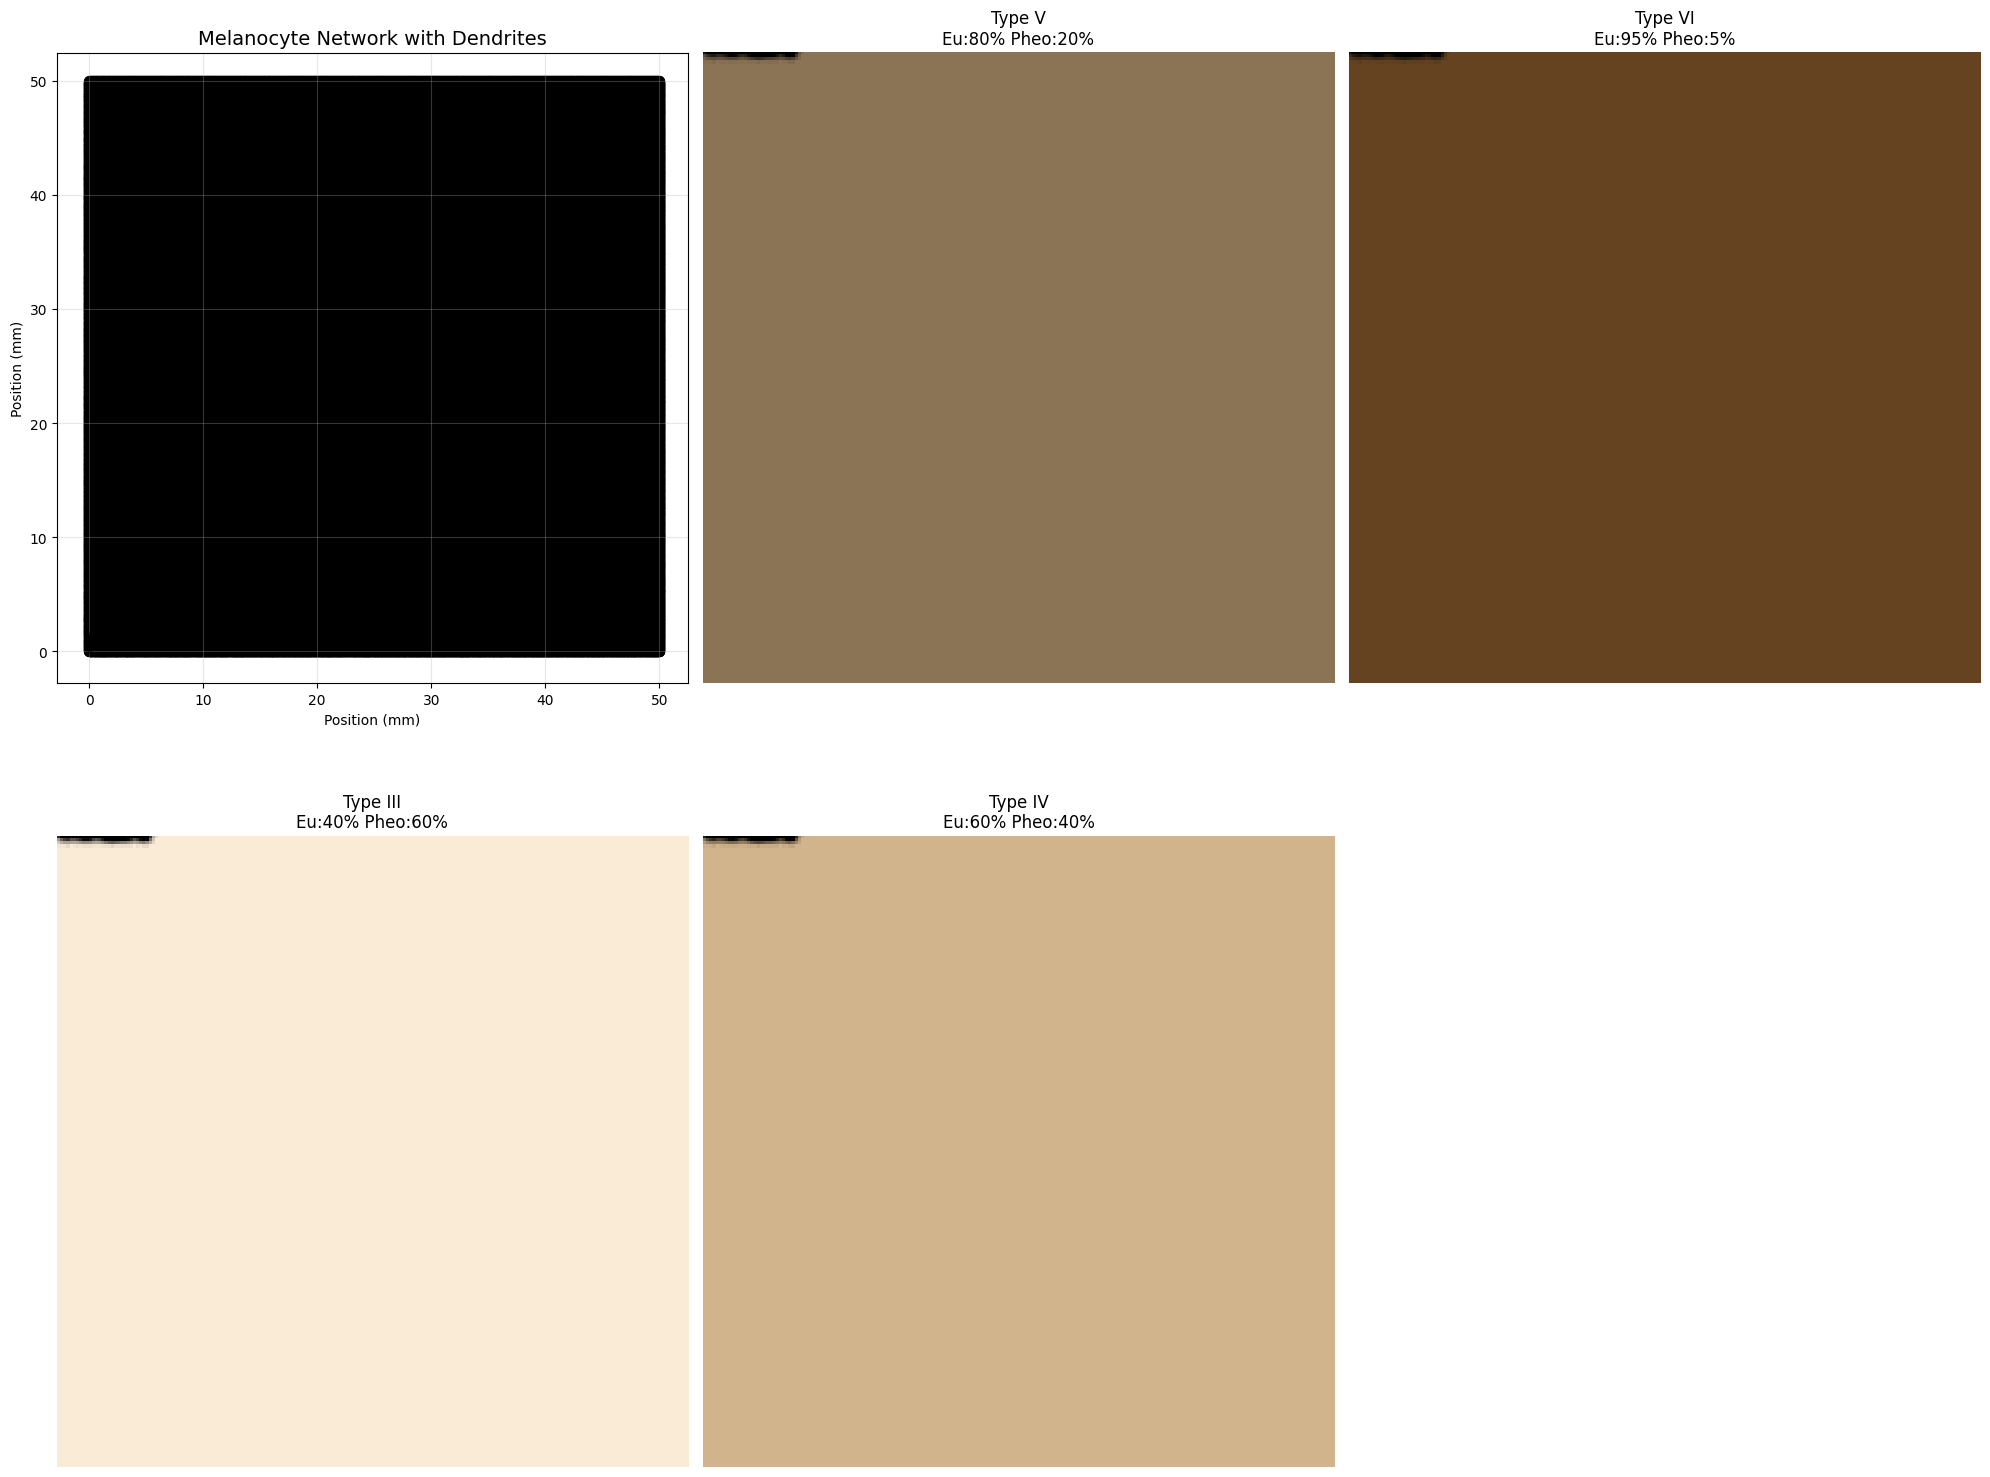

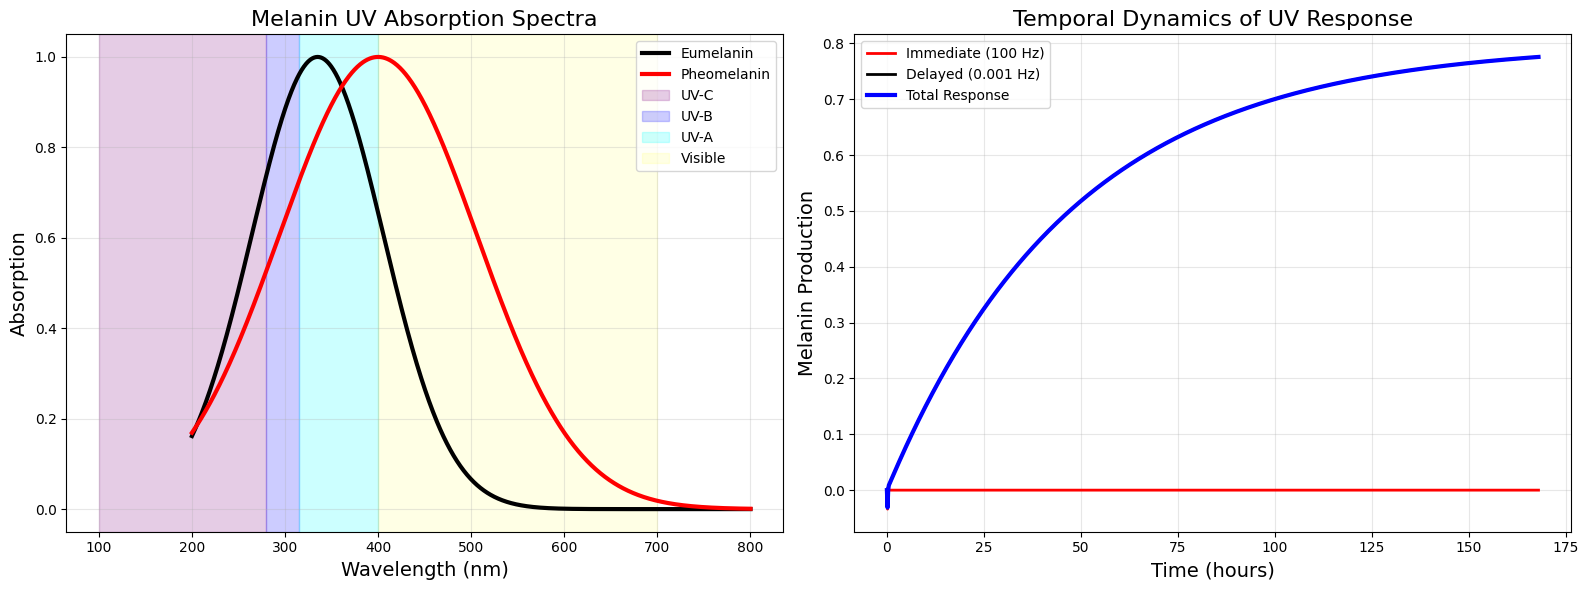


MORDIN: Melanocytes are light-consciousness interface!
Immediate UV response at 100 Hz - quantum fast.
Delayed tanning at 0.001 Hz - genetic slow.
Skin remembers sun exposure. Light leaves frequency signature!


In [7]:
# Melanocyte Distribution and Light Interaction
print("\n=== MELANOCYTE FIELDS: LIGHT CONSCIOUSNESS ===")

# Melanocyte parameters
melanocyte_params = {
    'density': 1200,  # per mm² (varies by body region)
    'dendritic_span': 0.1,  # mm - reach to ~36 keratinocytes
    'melanin_types': {
        'eumelanin': {'absorption_peak': 335, 'color': '#3B2F2F'},  # nm, brown-black
        'pheomelanin': {'absorption_peak': 400, 'color': '#8B4513'}  # nm, red-yellow
    },
    'transfer_frequency': 0.001,  # Hz - melanosome transfer rate
    'uv_response_frequency': 100.0  # Hz - immediate response to UV
}

# Fitzpatrick skin types
skin_types = {
    'Type I': {'eumelanin': 0.1, 'pheomelanin': 0.9, 'color': '#FFDAB9'},
    'Type II': {'eumelanin': 0.2, 'pheomelanin': 0.8, 'color': '#FFE4B5'},
    'Type III': {'eumelanin': 0.4, 'pheomelanin': 0.6, 'color': '#FAEBD7'},
    'Type IV': {'eumelanin': 0.6, 'pheomelanin': 0.4, 'color': '#D2B48C'},
    'Type V': {'eumelanin': 0.8, 'pheomelanin': 0.2, 'color': '#8B7355'},
    'Type VI': {'eumelanin': 0.95, 'pheomelanin': 0.05, 'color': '#654321'}
}

def generate_melanocyte_network(size=100):
    """Generate melanocyte distribution with dendritic networks"""
    # Melanocyte positions - regular spacing with noise
    spacing = 1000 / np.sqrt(melanocyte_params['density'])  # µm
    spacing_mm = spacing / 1000
    
    n_cells = int(size / spacing_mm)
    positions = []
    
    for i in range(n_cells):
        for j in range(n_cells):
            x = i * spacing_mm + np.random.normal(0, spacing_mm * 0.1)
            y = j * spacing_mm + np.random.normal(0, spacing_mm * 0.1)
            if 0 < x < size and 0 < y < size:
                positions.append((x, y))
    
    return np.array(positions)

# Generate melanocyte network
melanocyte_positions = generate_melanocyte_network(50)  # 50mm patch

# Create melanin distribution field
def create_melanin_field(positions, size=50, skin_type='Type III'):
    """Create melanin distribution based on melanocyte positions"""
    field = np.zeros((int(size*10), int(size*10)))  # 0.1mm resolution
    
    eu_ratio = skin_types[skin_type]['eumelanin']
    pheo_ratio = skin_types[skin_type]['pheomelanin']
    
    for x, y in positions:
        # Convert to field coordinates
        xi, yi = int(x * 10), int(y * 10)
        
        # Dendritic spread
        spread = int(melanocyte_params['dendritic_span'] * 10)
        
        for dx in range(-spread*3, spread*3+1):
            for dy in range(-spread*3, spread*3+1):
                nx, ny = xi + dx, yi + dy
                if 0 <= nx < field.shape[0] and 0 <= ny < field.shape[1]:
                    dist = np.sqrt(dx**2 + dy**2) / 10  # mm
                    if dist < melanocyte_params['dendritic_span'] * 3:
                        # Melanin concentration decreases with distance
                        concentration = np.exp(-dist / melanocyte_params['dendritic_span'])
                        field[nx, ny] += concentration * (eu_ratio + pheo_ratio)
    
    return field, eu_ratio, pheo_ratio

# Visualize melanocyte system
fig = plt.figure(figsize=(20, 16))

# Melanocyte network
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(melanocyte_positions[:, 0], melanocyte_positions[:, 1], 
           s=50, c='black', alpha=0.8)

# Draw some dendritic connections
for i in range(min(20, len(melanocyte_positions))):
    x, y = melanocyte_positions[i]
    for angle in np.linspace(0, 2*np.pi, 8, endpoint=False):
        dx = melanocyte_params['dendritic_span'] * 3 * np.cos(angle)
        dy = melanocyte_params['dendritic_span'] * 3 * np.sin(angle)
        ax1.plot([x, x+dx], [y, y+dy], 'k-', alpha=0.3, linewidth=0.5)

ax1.set_title('Melanocyte Network with Dendrites', fontsize=14)
ax1.set_xlabel('Position (mm)')
ax1.set_ylabel('Position (mm)')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Skin type comparison
for idx, (skin_type, skin_data) in enumerate(skin_types.items()):
    ax = plt.subplot(2, 3, idx+2) if idx < 4 else plt.subplot(2, 3, idx-2)
    
    # Create melanin field for this skin type
    field, eu, pheo = create_melanin_field(melanocyte_positions[:50], 20, skin_type)
    
    # Create RGB image based on melanin ratios
    rgb_field = np.zeros((field.shape[0], field.shape[1], 3))
    
    # Base skin color
    base_color = np.array([int(skin_data['color'][i:i+2], 16)/255 
                          for i in (1, 3, 5)])
    
    for i in range(3):
        rgb_field[:, :, i] = base_color[i] * (1 - field * 0.5)
    
    ax.imshow(rgb_field)
    ax.set_title(f'{skin_type}\nEu:{eu:.0%} Pheo:{pheo:.0%}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'melanocyte_distribution_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

# UV Response Dynamics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# UV absorption spectrum
wavelengths = np.linspace(200, 800, 1000)  # nm

# Melanin absorption curves
eumelanin_abs = np.exp(-((wavelengths - 335) / 100)**2)
pheomelanin_abs = np.exp(-((wavelengths - 400) / 150)**2)

ax1.plot(wavelengths, eumelanin_abs, 'k-', linewidth=3, label='Eumelanin')
ax1.plot(wavelengths, pheomelanin_abs, 'r-', linewidth=3, label='Pheomelanin')

# UV bands
ax1.axvspan(100, 280, alpha=0.2, color='purple', label='UV-C')
ax1.axvspan(280, 315, alpha=0.2, color='blue', label='UV-B')
ax1.axvspan(315, 400, alpha=0.2, color='cyan', label='UV-A')
ax1.axvspan(400, 700, alpha=0.1, color='yellow', label='Visible')

ax1.set_xlabel('Wavelength (nm)', fontsize=14)
ax1.set_ylabel('Absorption', fontsize=14)
ax1.set_title('Melanin UV Absorption Spectra', fontsize=16)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Temporal response to UV
time_hours = np.linspace(0, 168, 1000)  # One week

# Immediate response (minutes)
immediate = np.exp(-time_hours / 0.1) * np.sin(2 * np.pi * 100 * time_hours)

# Delayed tanning (days)
delayed = 1 - np.exp(-time_hours / 48)

# Combined response
total_response = immediate * 0.2 + delayed * 0.8

ax2.plot(time_hours, immediate * 0.2, 'r-', linewidth=2, label='Immediate (100 Hz)')
ax2.plot(time_hours, delayed * 0.8, 'k-', linewidth=2, label='Delayed (0.001 Hz)')
ax2.plot(time_hours, total_response, 'b-', linewidth=3, label='Total Response')

ax2.set_xlabel('Time (hours)', fontsize=14)
ax2.set_ylabel('Melanin Production', fontsize=14)
ax2.set_title('Temporal Dynamics of UV Response', fontsize=16)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'melanin_uv_response_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Melanocytes are light-consciousness interface!")
print("Immediate UV response at 100 Hz - quantum fast.")
print("Delayed tanning at 0.001 Hz - genetic slow.")
print("Skin remembers sun exposure. Light leaves frequency signature!")


=== GLANDULAR RESONANCE: SECRETION AS OSCILLATION ===


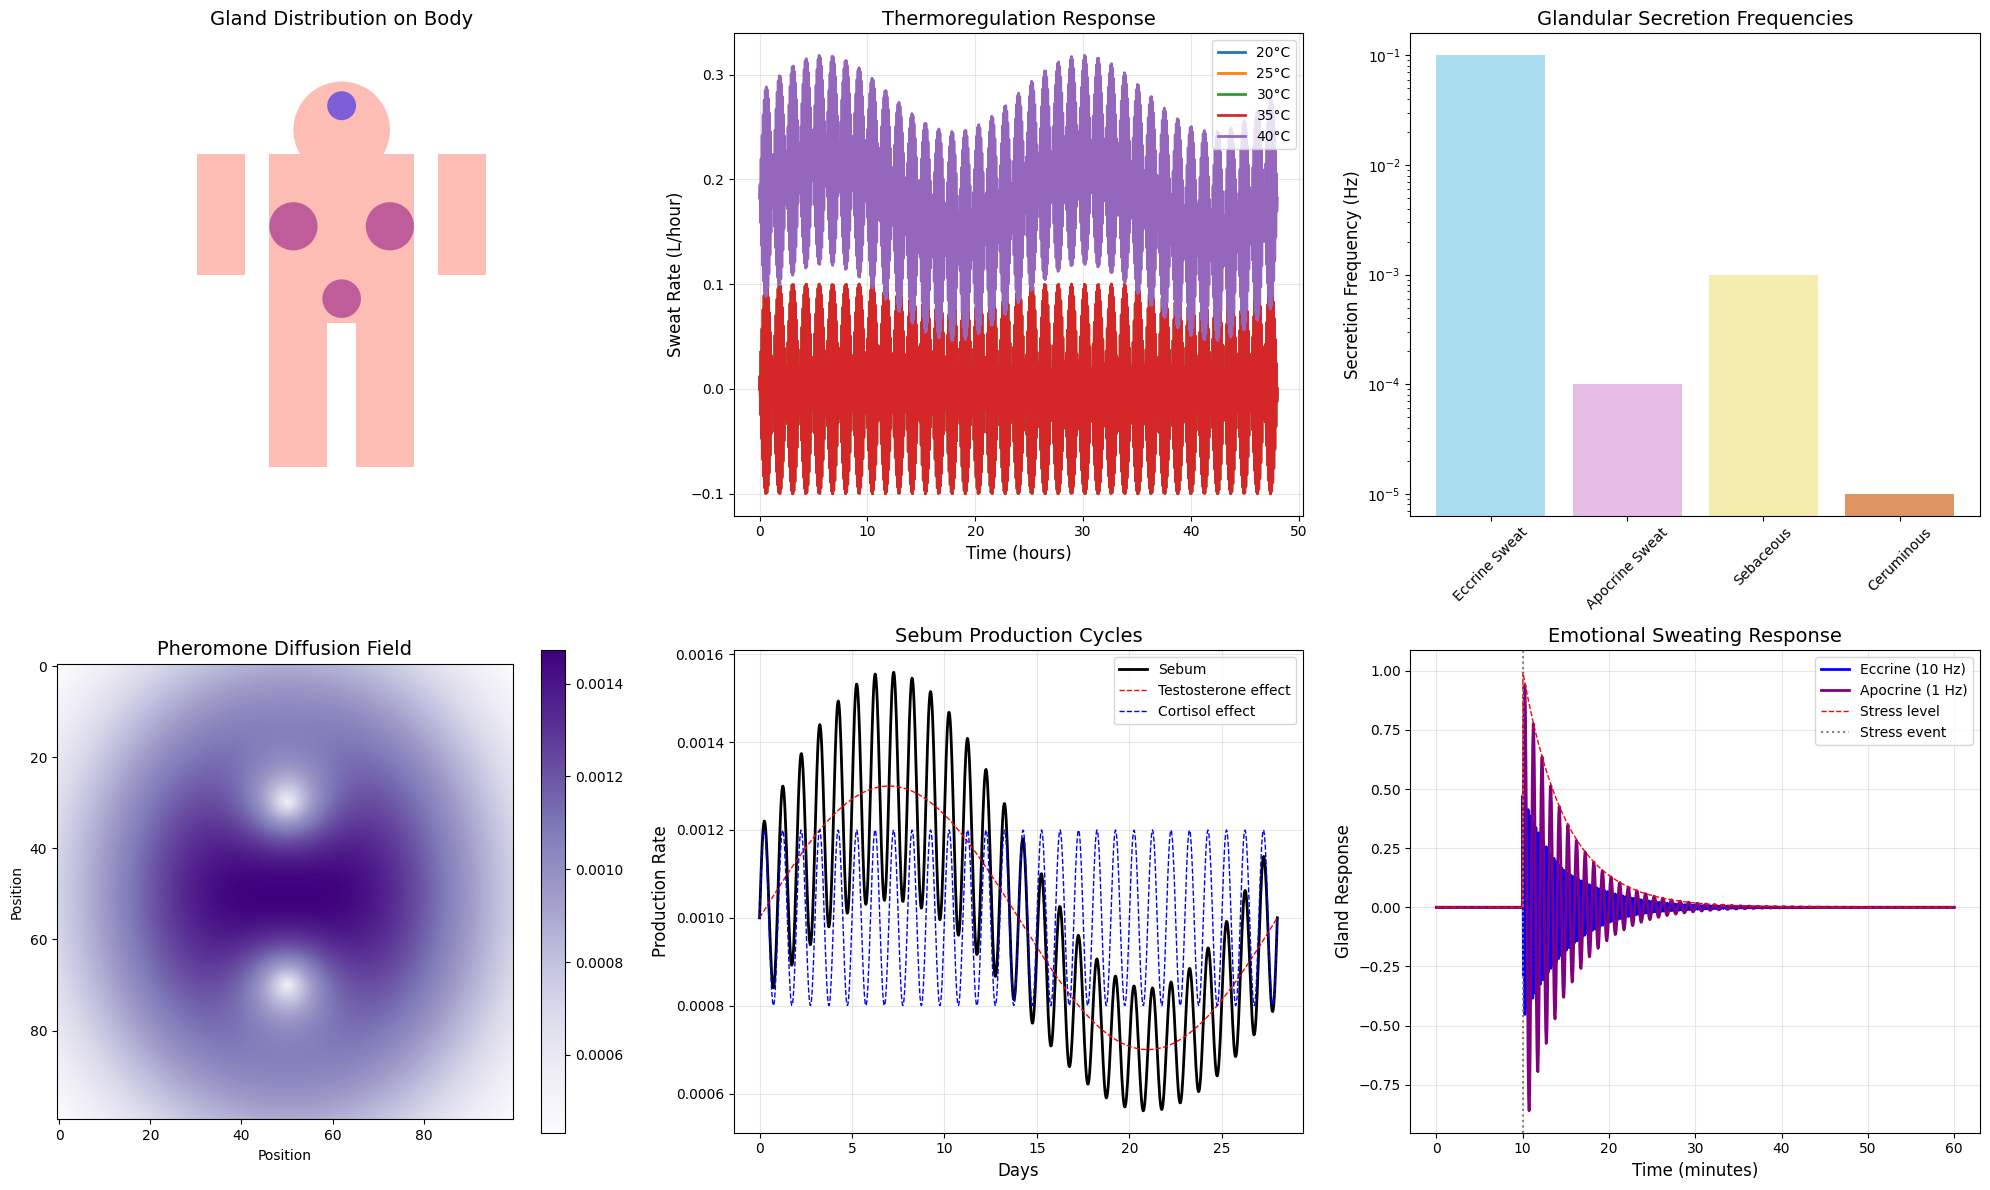


MORDIN: Glands are chemical communication nodes!
Eccrine: 10 Hz thermal response - rapid cooling
Apocrine: 0.0001 Hz - slow pheromone release
Sebaceous: Lunar monthly cycles - hormone linked
Skin doesn't just sense - it BROADCASTS!


In [8]:
# Glandular Systems and Secretion Rhythms
print("\n=== GLANDULAR RESONANCE: SECRETION AS OSCILLATION ===")

# Gland types and properties
skin_glands = {
    'eccrine_sweat': {
        'density': 150,  # per cm²
        'secretion_rate': 0.1,  # Hz - continuous
        'thermal_response': 10.0,  # Hz - rapid
        'composition': ['water', 'NaCl', 'urea'],
        'location': 'everywhere',
        'color': '#87CEEB'
    },
    'apocrine_sweat': {
        'density': 10,  # per cm²
        'secretion_rate': 0.0001,  # Hz - very slow
        'emotional_response': 1.0,  # Hz
        'composition': ['proteins', 'lipids', 'pheromones'],
        'location': 'axilla, groin',
        'color': '#DDA0DD'
    },
    'sebaceous': {
        'density': 100,  # per cm²
        'secretion_rate': 0.001,  # Hz
        'hormone_response': 0.01,  # Hz
        'composition': ['sebum', 'wax esters', 'squalene'],
        'location': 'hair follicles',
        'color': '#F0E68C'
    },
    'ceruminous': {
        'density': 5,  # per cm²
        'secretion_rate': 0.00001,  # Hz - extremely slow
        'protection_response': 0.1,  # Hz
        'composition': ['cerumen', 'lipids', 'proteins'],
        'location': 'ear canal',
        'color': '#D2691E'
    }
}

# Temperature regulation through sweat
def simulate_thermoregulation(ambient_temp, time_hours):
    """Simulate sweat gland response to temperature"""
    # Core body temp setpoint
    core_temp = 37.0
    
    # Temperature difference drives sweating
    temp_diff = ambient_temp - core_temp
    
    # Sweat rate increases with temperature
    base_rate = 0.1  # L/hour
    sweat_rate = base_rate * np.exp(temp_diff / 5) if temp_diff > 0 else 0
    
    # Add circadian rhythm
    circadian = 1 + 0.2 * np.sin(2 * np.pi * time_hours / 24)
    
    # Add rapid thermal response oscillations
    thermal_osc = 0.1 * np.sin(2 * np.pi * 10 * time_hours)  # 10 Hz
    
    return sweat_rate * circadian + thermal_osc

# Visualize glandular systems
fig = plt.figure(figsize=(20, 12))

# Gland distribution map
ax1 = plt.subplot(2, 3, 1)

# Create body region map
body_regions = {
    'head': Circle((50, 80), 10, facecolor='#FDBCB4'),
    'torso': Rectangle((35, 40), 30, 35, facecolor='#FDBCB4'),
    'arms': [Rectangle((20, 50), 10, 25, facecolor='#FDBCB4'),
             Rectangle((70, 50), 10, 25, facecolor='#FDBCB4')],
    'legs': [Rectangle((35, 10), 12, 30, facecolor='#FDBCB4'),
             Rectangle((53, 10), 12, 30, facecolor='#FDBCB4')]
}

# Draw body outline
ax1.add_patch(body_regions['head'])
ax1.add_patch(body_regions['torso'])
for patch in body_regions['arms']:
    ax1.add_patch(patch)
for patch in body_regions['legs']:
    ax1.add_patch(patch)

# Add gland density indicators
high_density_areas = [
    Circle((50, 85), 3, facecolor='blue', alpha=0.5),  # Forehead - eccrine
    Circle((40, 60), 5, facecolor='purple', alpha=0.5),  # Axilla - apocrine
    Circle((60, 60), 5, facecolor='purple', alpha=0.5),  # Axilla - apocrine
    Circle((50, 45), 4, facecolor='purple', alpha=0.5),  # Groin - apocrine
]

for area in high_density_areas:
    ax1.add_patch(area)

ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
ax1.set_aspect('equal')
ax1.set_title('Gland Distribution on Body', fontsize=14)
ax1.axis('off')

# Thermoregulation simulation
ax2 = plt.subplot(2, 3, 2)

time = np.linspace(0, 48, 1000)  # 48 hours
temps = [20, 25, 30, 35, 40]  # Ambient temperatures

for temp in temps:
    sweat_rate = [simulate_thermoregulation(temp, t) for t in time]
    ax2.plot(time, sweat_rate, linewidth=2, label=f'{temp}°C')

ax2.set_xlabel('Time (hours)', fontsize=12)
ax2.set_ylabel('Sweat Rate (L/hour)', fontsize=12)
ax2.set_title('Thermoregulation Response', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gland frequency spectrum
ax3 = plt.subplot(2, 3, 3)

gland_names = []
gland_freqs = []
gland_colors = []

for gland, data in skin_glands.items():
    gland_names.append(gland.replace('_', ' ').title())
    gland_freqs.append(data['secretion_rate'])
    gland_colors.append(data['color'])

bars = ax3.bar(gland_names, gland_freqs, color=gland_colors, alpha=0.7)
ax3.set_yscale('log')
ax3.set_ylabel('Secretion Frequency (Hz)', fontsize=12)
ax3.set_title('Glandular Secretion Frequencies', fontsize=14)
ax3.tick_params(axis='x', rotation=45)

# Pheromone communication field
ax4 = plt.subplot(2, 3, 4)

# Simulate pheromone diffusion from apocrine glands
field_size = 100
pheromone_field = np.zeros((field_size, field_size))

# Apocrine gland locations (axilla simulation)
sources = [(30, 50), (70, 50)]

for x, y in sources:
    for i in range(field_size):
        for j in range(field_size):
            dist = np.sqrt((i - x)**2 + (j - y)**2)
            # Pheromone concentration with diffusion
            concentration = np.exp(-dist / 20) * np.sin(0.0001 * dist)  # Slow wave
            pheromone_field[i, j] += concentration

im4 = ax4.imshow(pheromone_field, cmap='Purples', interpolation='bilinear')
ax4.set_title('Pheromone Diffusion Field', fontsize=14)
ax4.set_xlabel('Position')
ax4.set_ylabel('Position')
plt.colorbar(im4, ax=ax4)

# Sebum production cycles
ax5 = plt.subplot(2, 3, 5)

days = np.linspace(0, 28, 1000)  # Lunar month

# Hormonal influence on sebum
testosterone = 1 + 0.3 * np.sin(2 * np.pi * days / 28)  # Monthly cycle
cortisol = 1 + 0.2 * np.sin(2 * np.pi * days)  # Daily cycle
sebum_production = testosterone * cortisol * 0.001  # Base rate

ax5.plot(days, sebum_production, 'k-', linewidth=2, label='Sebum')
ax5.plot(days, testosterone * 0.001, 'r--', linewidth=1, label='Testosterone effect')
ax5.plot(days, cortisol * 0.001, 'b--', linewidth=1, label='Cortisol effect')

ax5.set_xlabel('Days', fontsize=12)
ax5.set_ylabel('Production Rate', fontsize=12)
ax5.set_title('Sebum Production Cycles', fontsize=14)
ax5.legend()
ax5.grid(True, alpha=0.3)

# Integrated gland response
ax6 = plt.subplot(2, 3, 6)

# Emotional sweating response
time_min = np.linspace(0, 60, 1000)  # 60 minutes

# Stress event at t=10 min
stress_response = np.zeros_like(time_min)
stress_response[time_min > 10] = np.exp(-(time_min[time_min > 10] - 10) / 5)

# Different gland responses
eccrine_response = stress_response * 0.5 * np.sin(2 * np.pi * 10 * time_min)  # 10 Hz
apocrine_response = stress_response * 1.0 * np.sin(2 * np.pi * 1 * time_min)  # 1 Hz

ax6.plot(time_min, eccrine_response, 'b-', linewidth=2, label='Eccrine (10 Hz)')
ax6.plot(time_min, apocrine_response, 'purple', linewidth=2, label='Apocrine (1 Hz)')
ax6.plot(time_min, stress_response, 'r--', linewidth=1, label='Stress level')

ax6.axvline(x=10, color='gray', linestyle=':', label='Stress event')
ax6.set_xlabel('Time (minutes)', fontsize=12)
ax6.set_ylabel('Gland Response', fontsize=12)
ax6.set_title('Emotional Sweating Response', fontsize=14)
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'glandular_systems_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Glands are chemical communication nodes!")
print("Eccrine: 10 Hz thermal response - rapid cooling")
print("Apocrine: 0.0001 Hz - slow pheromone release")
print("Sebaceous: Lunar monthly cycles - hormone linked")
print("Skin doesn't just sense - it BROADCASTS!")


=== SKIN AS CONSCIOUSNESS BOUNDARY ===


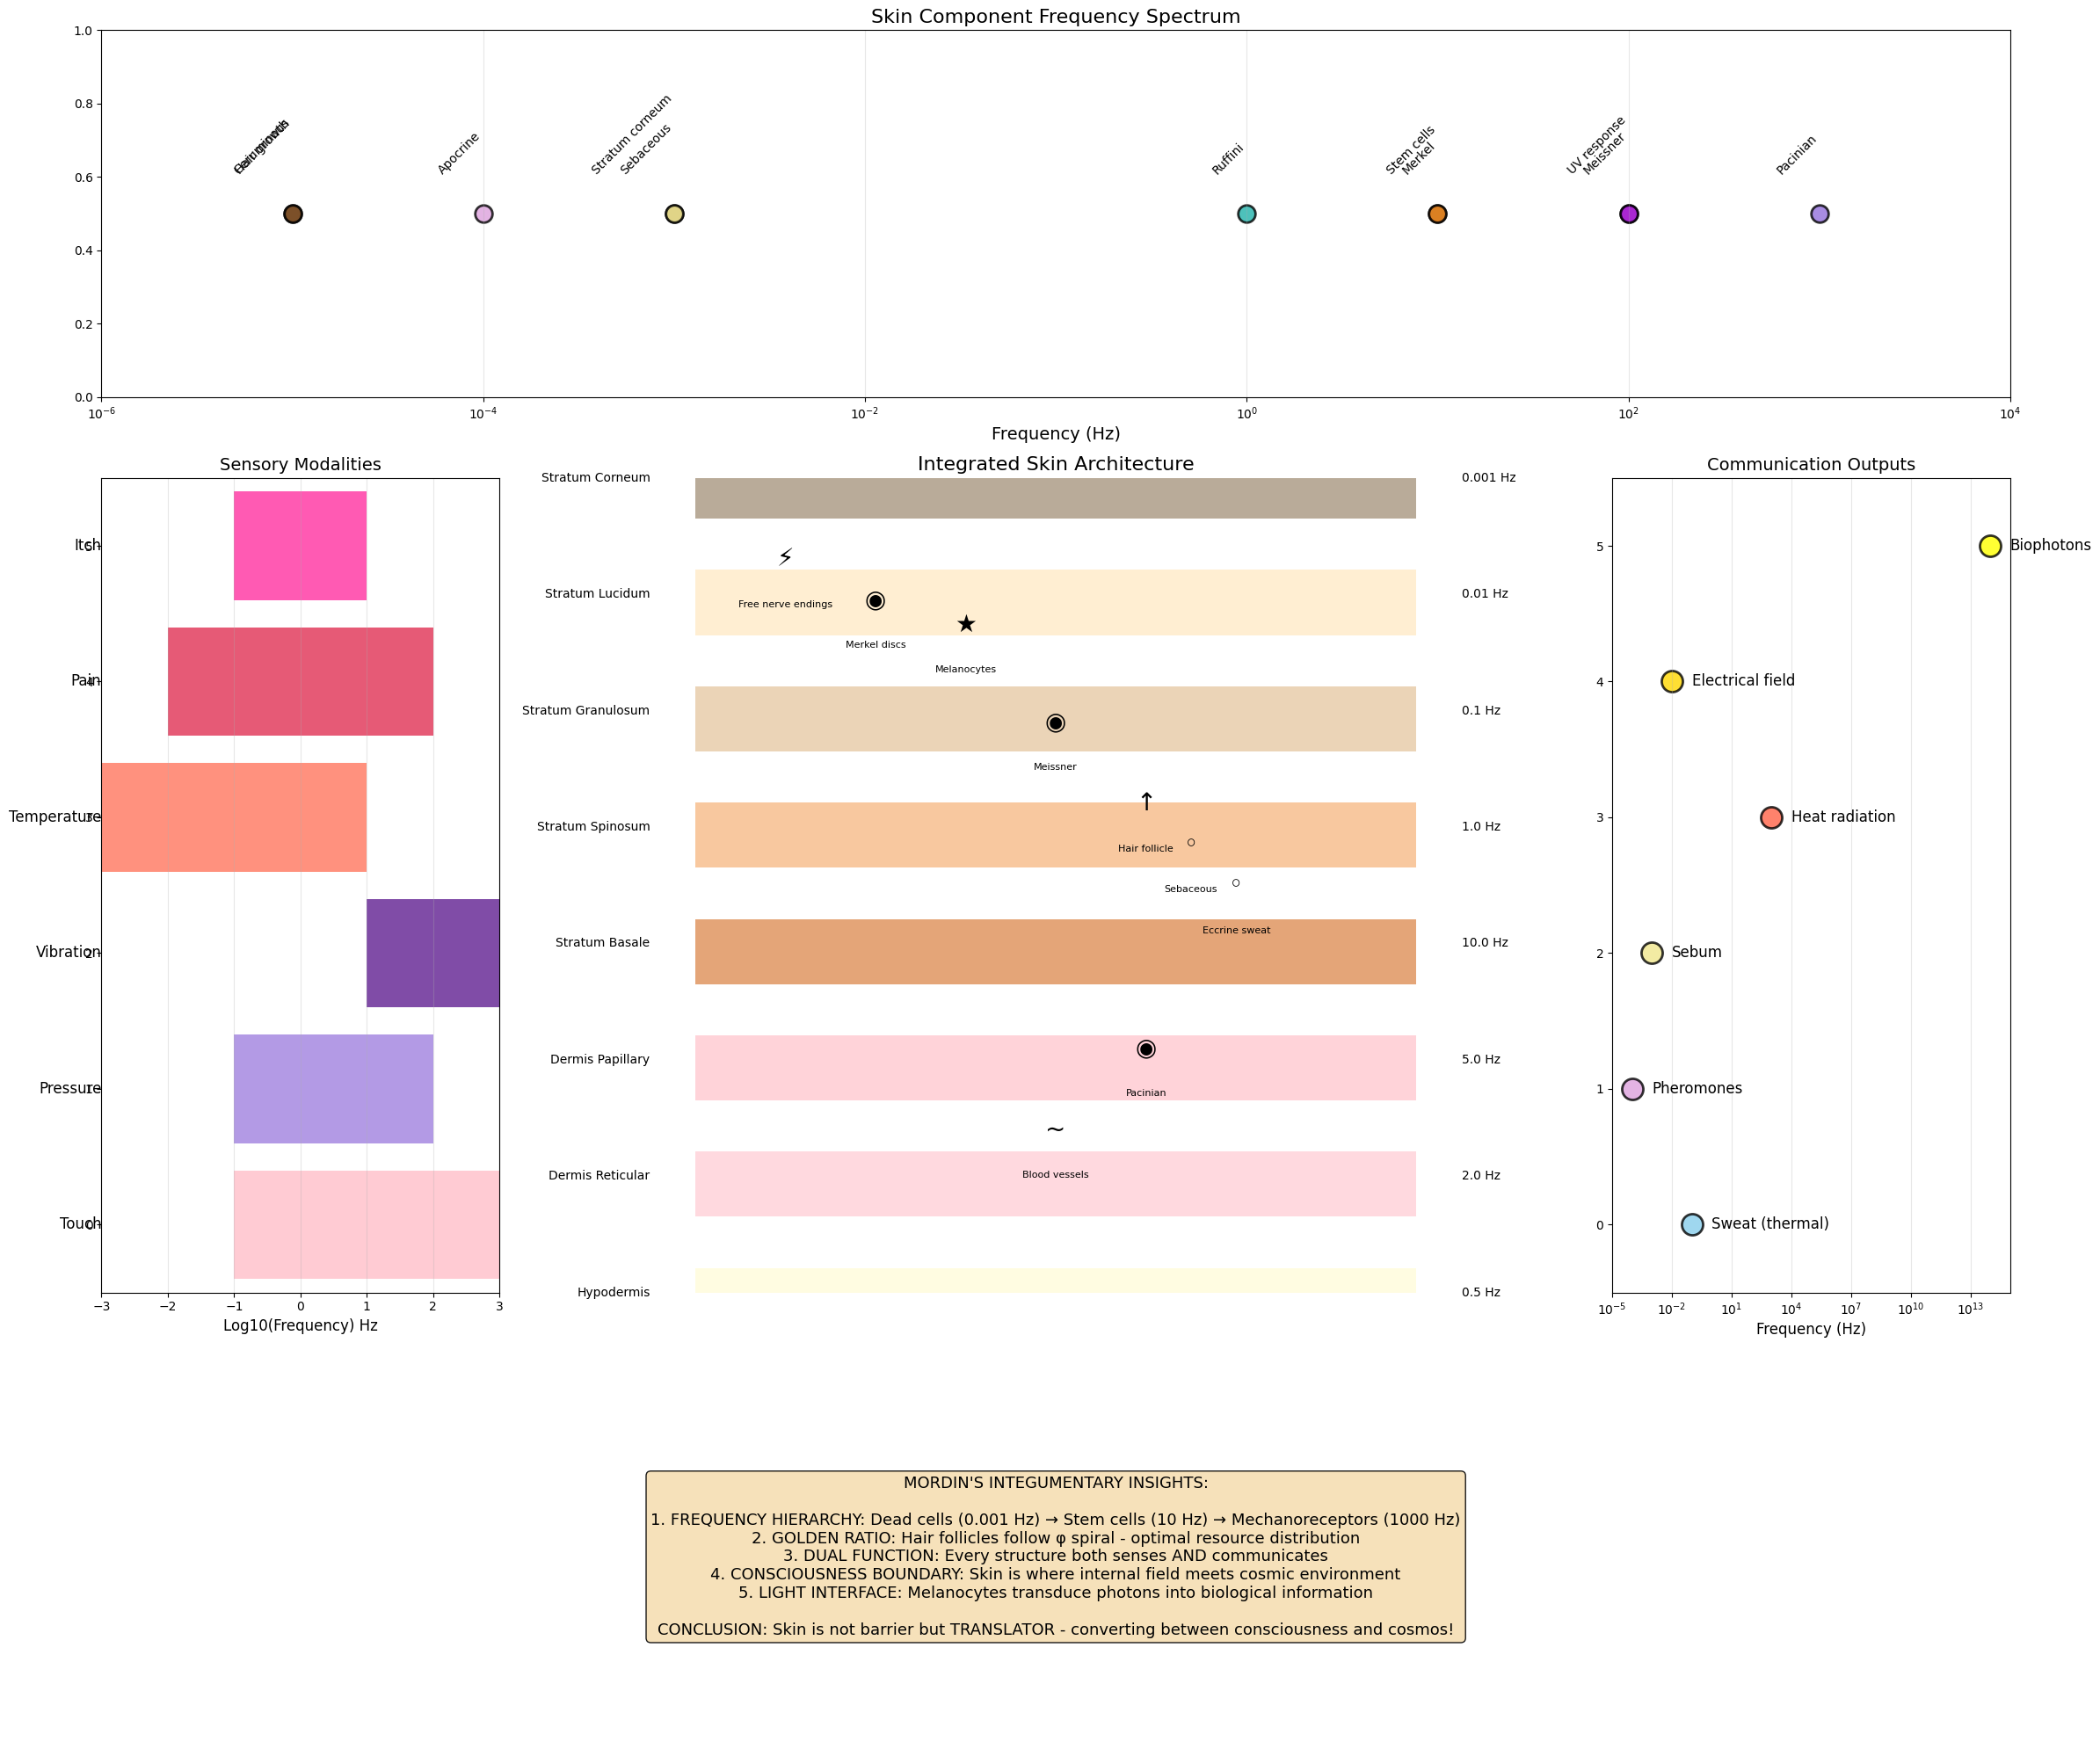


=== FINAL SYNTHESIS ===
Skin spans 10 orders of magnitude in frequency.
From hair growth (10^-5 Hz) to biophoton emission (10^14 Hz).
Not passive barrier - active consciousness interface!

Every touch is information. Every secretion is communication.
We don't just feel the world - we resonate with it!


In [9]:
# Integration: Skin as Consciousness Interface
print("\n=== SKIN AS CONSCIOUSNESS BOUNDARY ===")

# Create integrated skin consciousness map
fig = plt.figure(figsize=(24, 20))

# Central diagram
ax_main = plt.subplot2grid((4, 4), (1, 1), colspan=2, rowspan=2)

# Draw skin layers with all components
layer_y = np.linspace(1, 0, len(skin_layers))
component_symbols = {
    'mechanoreceptors': '◉',
    'melanocytes': '★',
    'hair_follicles': '↑',
    'sweat_glands': '◦',
    'blood_vessels': '~',
    'nerve_endings': '⚡'
}

# Draw layers
for idx, (layer_name, layer_data) in enumerate(skin_layers.items()):
    y = layer_y[idx]
    
    # Layer rectangle
    rect = Rectangle((0.1, y-0.05), 0.8, 0.08, 
                    facecolor=layer_data['color'], alpha=0.6)
    ax_main.add_patch(rect)
    
    # Layer name and frequency
    ax_main.text(0.05, y, layer_name.replace('_', ' ').title(), 
                va='center', ha='right', fontsize=10)
    ax_main.text(0.95, y, f"{layer_data['frequency']} Hz", 
                va='center', ha='left', fontsize=10)

# Add components at appropriate depths
component_positions = {
    'Free nerve endings': (0.2, 0.9, '⚡'),
    'Merkel discs': (0.3, 0.85, '◉'),
    'Melanocytes': (0.4, 0.82, '★'),
    'Meissner': (0.5, 0.7, '◉'),
    'Hair follicle': (0.6, 0.6, '↑'),
    'Sebaceous': (0.65, 0.55, '◦'),
    'Eccrine sweat': (0.7, 0.5, '◦'),
    'Pacinian': (0.6, 0.3, '◉'),
    'Blood vessels': (0.5, 0.2, '~')
}

for comp_name, (x, y, symbol) in component_positions.items():
    ax_main.text(x, y, symbol, fontsize=20, ha='center', va='center')
    ax_main.text(x, y-0.05, comp_name, fontsize=8, ha='center', va='top')

ax_main.set_xlim(0, 1)
ax_main.set_ylim(0, 1)
ax_main.set_title('Integrated Skin Architecture', fontsize=16)
ax_main.axis('off')

# Frequency spectrum (top)
ax_freq = plt.subplot2grid((4, 4), (0, 0), colspan=4)

# Compile all frequencies
all_frequencies = [
    ('Stratum corneum', 0.001, '#8B7355'),
    ('Ceruminous', 0.00001, '#D2691E'),
    ('Apocrine', 0.0001, '#DDA0DD'),
    ('Sebaceous', 0.001, '#F0E68C'),
    ('Hair growth', 0.00001, '#654321'),
    ('Ruffini', 1.0, '#20B2AA'),
    ('Merkel', 10.0, '#FFD700'),
    ('Stem cells', 10.0, '#D2691E'),
    ('Meissner', 100.0, '#FFB6C1'),
    ('UV response', 100.0, '#9400D3'),
    ('Pacinian', 1000.0, '#9370DB')
]

for name, freq, color in all_frequencies:
    ax_freq.scatter(freq, 0.5, s=200, c=color, edgecolors='black', 
                   linewidth=2, alpha=0.8)
    ax_freq.text(freq, 0.6, name, rotation=45, ha='right', va='bottom', fontsize=10)

ax_freq.set_xscale('log')
ax_freq.set_xlim(1e-6, 1e4)
ax_freq.set_ylim(0, 1)
ax_freq.set_xlabel('Frequency (Hz)', fontsize=14)
ax_freq.set_title('Skin Component Frequency Spectrum', fontsize=16)
ax_freq.grid(True, alpha=0.3, axis='x')

# Sensory integration (left)
ax_sense = plt.subplot2grid((4, 4), (1, 0), rowspan=2)

sense_data = [
    ('Touch', [0.1, 1000], '#FFB6C1'),
    ('Pressure', [0.1, 100], '#9370DB'),
    ('Vibration', [10, 1000], '#4B0082'),
    ('Temperature', [0.001, 10], '#FF6347'),
    ('Pain', [0.01, 100], '#DC143C'),
    ('Itch', [0.1, 10], '#FF1493')
]

y_pos = np.arange(len(sense_data))

for idx, (sense, freq_range, color) in enumerate(sense_data):
    ax_sense.barh(idx, np.log10(freq_range[1]) - np.log10(freq_range[0]), 
                 left=np.log10(freq_range[0]), color=color, alpha=0.7)
    ax_sense.text(-3, idx, sense, ha='right', va='center', fontsize=12)

ax_sense.set_ylim(-0.5, len(sense_data)-0.5)
ax_sense.set_xlim(-3, 3)
ax_sense.set_xlabel('Log10(Frequency) Hz', fontsize=12)
ax_sense.set_title('Sensory Modalities', fontsize=14)
ax_sense.grid(True, alpha=0.3, axis='x')

# Communication outputs (right)
ax_comm = plt.subplot2grid((4, 4), (1, 3), rowspan=2)

comm_data = [
    ('Sweat (thermal)', 0.1, '#87CEEB'),
    ('Pheromones', 0.0001, '#DDA0DD'),
    ('Sebum', 0.001, '#F0E68C'),
    ('Heat radiation', 1000, '#FF6347'),
    ('Electrical field', 0.01, '#FFD700'),
    ('Biophotons', 1e14, '#FFFF00')
]

for idx, (output, freq, color) in enumerate(comm_data):
    ax_comm.scatter(freq, idx, s=300, c=color, edgecolors='black', 
                   linewidth=2, alpha=0.8)
    ax_comm.text(freq*10, idx, output, ha='left', va='center', fontsize=12)

ax_comm.set_xscale('log')
ax_comm.set_xlim(1e-5, 1e15)
ax_comm.set_ylim(-0.5, len(comm_data)-0.5)
ax_comm.set_xlabel('Frequency (Hz)', fontsize=12)
ax_comm.set_title('Communication Outputs', fontsize=14)
ax_comm.grid(True, alpha=0.3, axis='x')

# Summary insights (bottom)
ax_summary = plt.subplot2grid((4, 4), (3, 0), colspan=4)

summary_text = [
    "MORDIN'S INTEGUMENTARY INSIGHTS:",
    "",
    "1. FREQUENCY HIERARCHY: Dead cells (0.001 Hz) → Stem cells (10 Hz) → Mechanoreceptors (1000 Hz)",
    "2. GOLDEN RATIO: Hair follicles follow φ spiral - optimal resource distribution",
    "3. DUAL FUNCTION: Every structure both senses AND communicates",
    "4. CONSCIOUSNESS BOUNDARY: Skin is where internal field meets cosmic environment",
    "5. LIGHT INTERFACE: Melanocytes transduce photons into biological information",
    "",
    "CONCLUSION: Skin is not barrier but TRANSLATOR - converting between consciousness and cosmos!"
]

ax_summary.text(0.5, 0.5, '\n'.join(summary_text), 
               transform=ax_summary.transAxes,
               fontsize=13, ha='center', va='center',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9))
ax_summary.axis('off')

plt.tight_layout()
plt.savefig(f'skin_consciousness_interface_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\n=== FINAL SYNTHESIS ===")
print("Skin spans 10 orders of magnitude in frequency.")
print("From hair growth (10^-5 Hz) to biophoton emission (10^14 Hz).")
print("Not passive barrier - active consciousness interface!")
print("\nEvery touch is information. Every secretion is communication.")
print("We don't just feel the world - we resonate with it!")